# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import subset_df, plot_in_fig

2024-06-03 13:54:39.106222: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 13:54:39.112362: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 13:54:39.216657: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 13:54:41.055292: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
###tma.clear_directory(text_curater="MAGAN")

#Converts old way of storing files to the new - if any
#tma.change_old_files_to_new()

Preparing to delete 1507 files
First 10 file names to be deleted
-------------------------------------------------
['/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/audiology/MAGAN(r1825)_AP(0.05-0.1-0.15-0.2-0.3)_38.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/audiology/MAGAN(t1825)_AP(0.05-0.1-0.15-0.2-0.3)_38.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/audiology/MAGAN(s2446)_AP(0.05-0.1-0.15-0.2-0.3)_38.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/audiology/MAGAN(e1825)_AP(0.05-0.1-0.15-0.2-0.3)_38.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/audiology/MAGAN(t4507)_AP(0.05-0.1-0.15-0.2-0.3)_38.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/audiology/MAGAN(t3658)_AP(0.05-0.1-0.15-0.2-0.3)_38.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/audiology/MAGAN(r3101)_AP(0.05-0.1-0.15-0.2-0.3)_38.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/audiology/MAGAN(e2446)_AP(0.05-0.1-0.15-0.2-0.

True

In [4]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="glass.csv", split = "random", percent_of_anchors = [0.05, 0.1, 0.15, 0.2, 0.3], verbose = 2)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_SPUD_tests(kind = ["distance"])
#test.run_DIG_tests(predict = True)
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#test.run_MAGAN_tests()
#test.run_KNN_tests()
test.run_JLMA_tests()


 
 
---------------------------       Initalizing class with glass.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (214, 2)
Split B Features shape (214, 7)
MDS initialized with 2 components
The knn values are: (2, 7, 12, 17, 22, 27, 32, 37, 42, 47)

--------------------------------------   JLMA TESTS /glass   --------------------------------------

KNN 2
    Percent of Anchors 0.05
        FOSCTTM 0.4540789588610359
        Cross Embedding: 0.2570093457943925
    Percent of Anchors 0.1
        FOSCTTM 0.45562931260372086
        Cross Embedding: 0.2616822429906542
    Percent of Anchors 0.15
        FOSCTTM 0.45579308236527205
        Cross Embedding: 0.26635514018691586
    Percent of Anchors 0.2
        FOSCTTM 0.4552908550965149
        Cross Embedding: 0.26635514018691586
    Percent of Anchors 0.3
        FOSCTTM 0.4536640754651061
        Cross Embedding: 0.2570093457943925
KNN 7
    Percent of Anchors 0.05
        FOSCTTM 0.448838

True

In [2]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

2024-05-29 17:19:48.432002: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 17:19:48.439167: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 17:19:48.504495: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 17:19:48.508780: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 17:19:48.511828: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 17:19:48.549192: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your

In [151]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

In [163]:
len(df["seed"].unique())

360

In [147]:
df.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
259913,hill_valley,SPUD,9595,random,67,0.11,0.5,NaN,NaN,abs,similarity,0.013623,0.506601,NaN,NaN,0.492977
330902,hepatitis,DTA,7827,skewed,26,0.17,0.5,NaN,NaN,NaN,NaN,0.184858,0.661836,NaN,NaN,0.476977
623282,Medicaldataset,DIG,4278,turn,191,0.15,0.1,full,0.417104,NaN,NaN,0.250319,0.494314,NaN,NaN,0.243995
322872,zoo,SPUD,956,random,2,0.01,0.2,NaN,NaN,abs,distance,0.730124,0.000000,NaN,NaN,-0.730124
341545,hepatitis,DIG,3642,random,29,0.19,0.05,full,0.300405,NaN,NaN,0.430739,0.615942,0.642857,0.452381,0.185203


In [15]:
from utils import get_DataFrame_stats
get_DataFrame_stats()

<><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>      DataFrame Statistics        <><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Total Number of instances in DataFrame: 646787


 Method        Lengths
--------      ----------
 MAGAN:          1389
 SSMA:          57700
 DTA:          57720
 Nama:          5768
 SPUD:          343930
 DIG:          180280


----------------------       Splits      ----------------------
Total data of random: 148839

 random        Lengths
--------      ----------
 MAGAN:          320
 SSMA:          14640
 DTA:          14650
 Nama:          1459
 SPUD:          71100
 DIG:          46670


Total data of even: 72265

 even        Lengths
--------      ----------
 MAGAN:          288
 SSMA:          5250
 DTA:          5260
 Nama:          527
 SPUD:          31460
 DIG:          29480


Total data of skewed: 156621

 skewed        Lengths
--------      ----------
 MAGAN:          261
 SSMA:          12100
 DTA:   

# Visualization Tests

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

Secondly, MAGAN FOSCTTM is alway very low

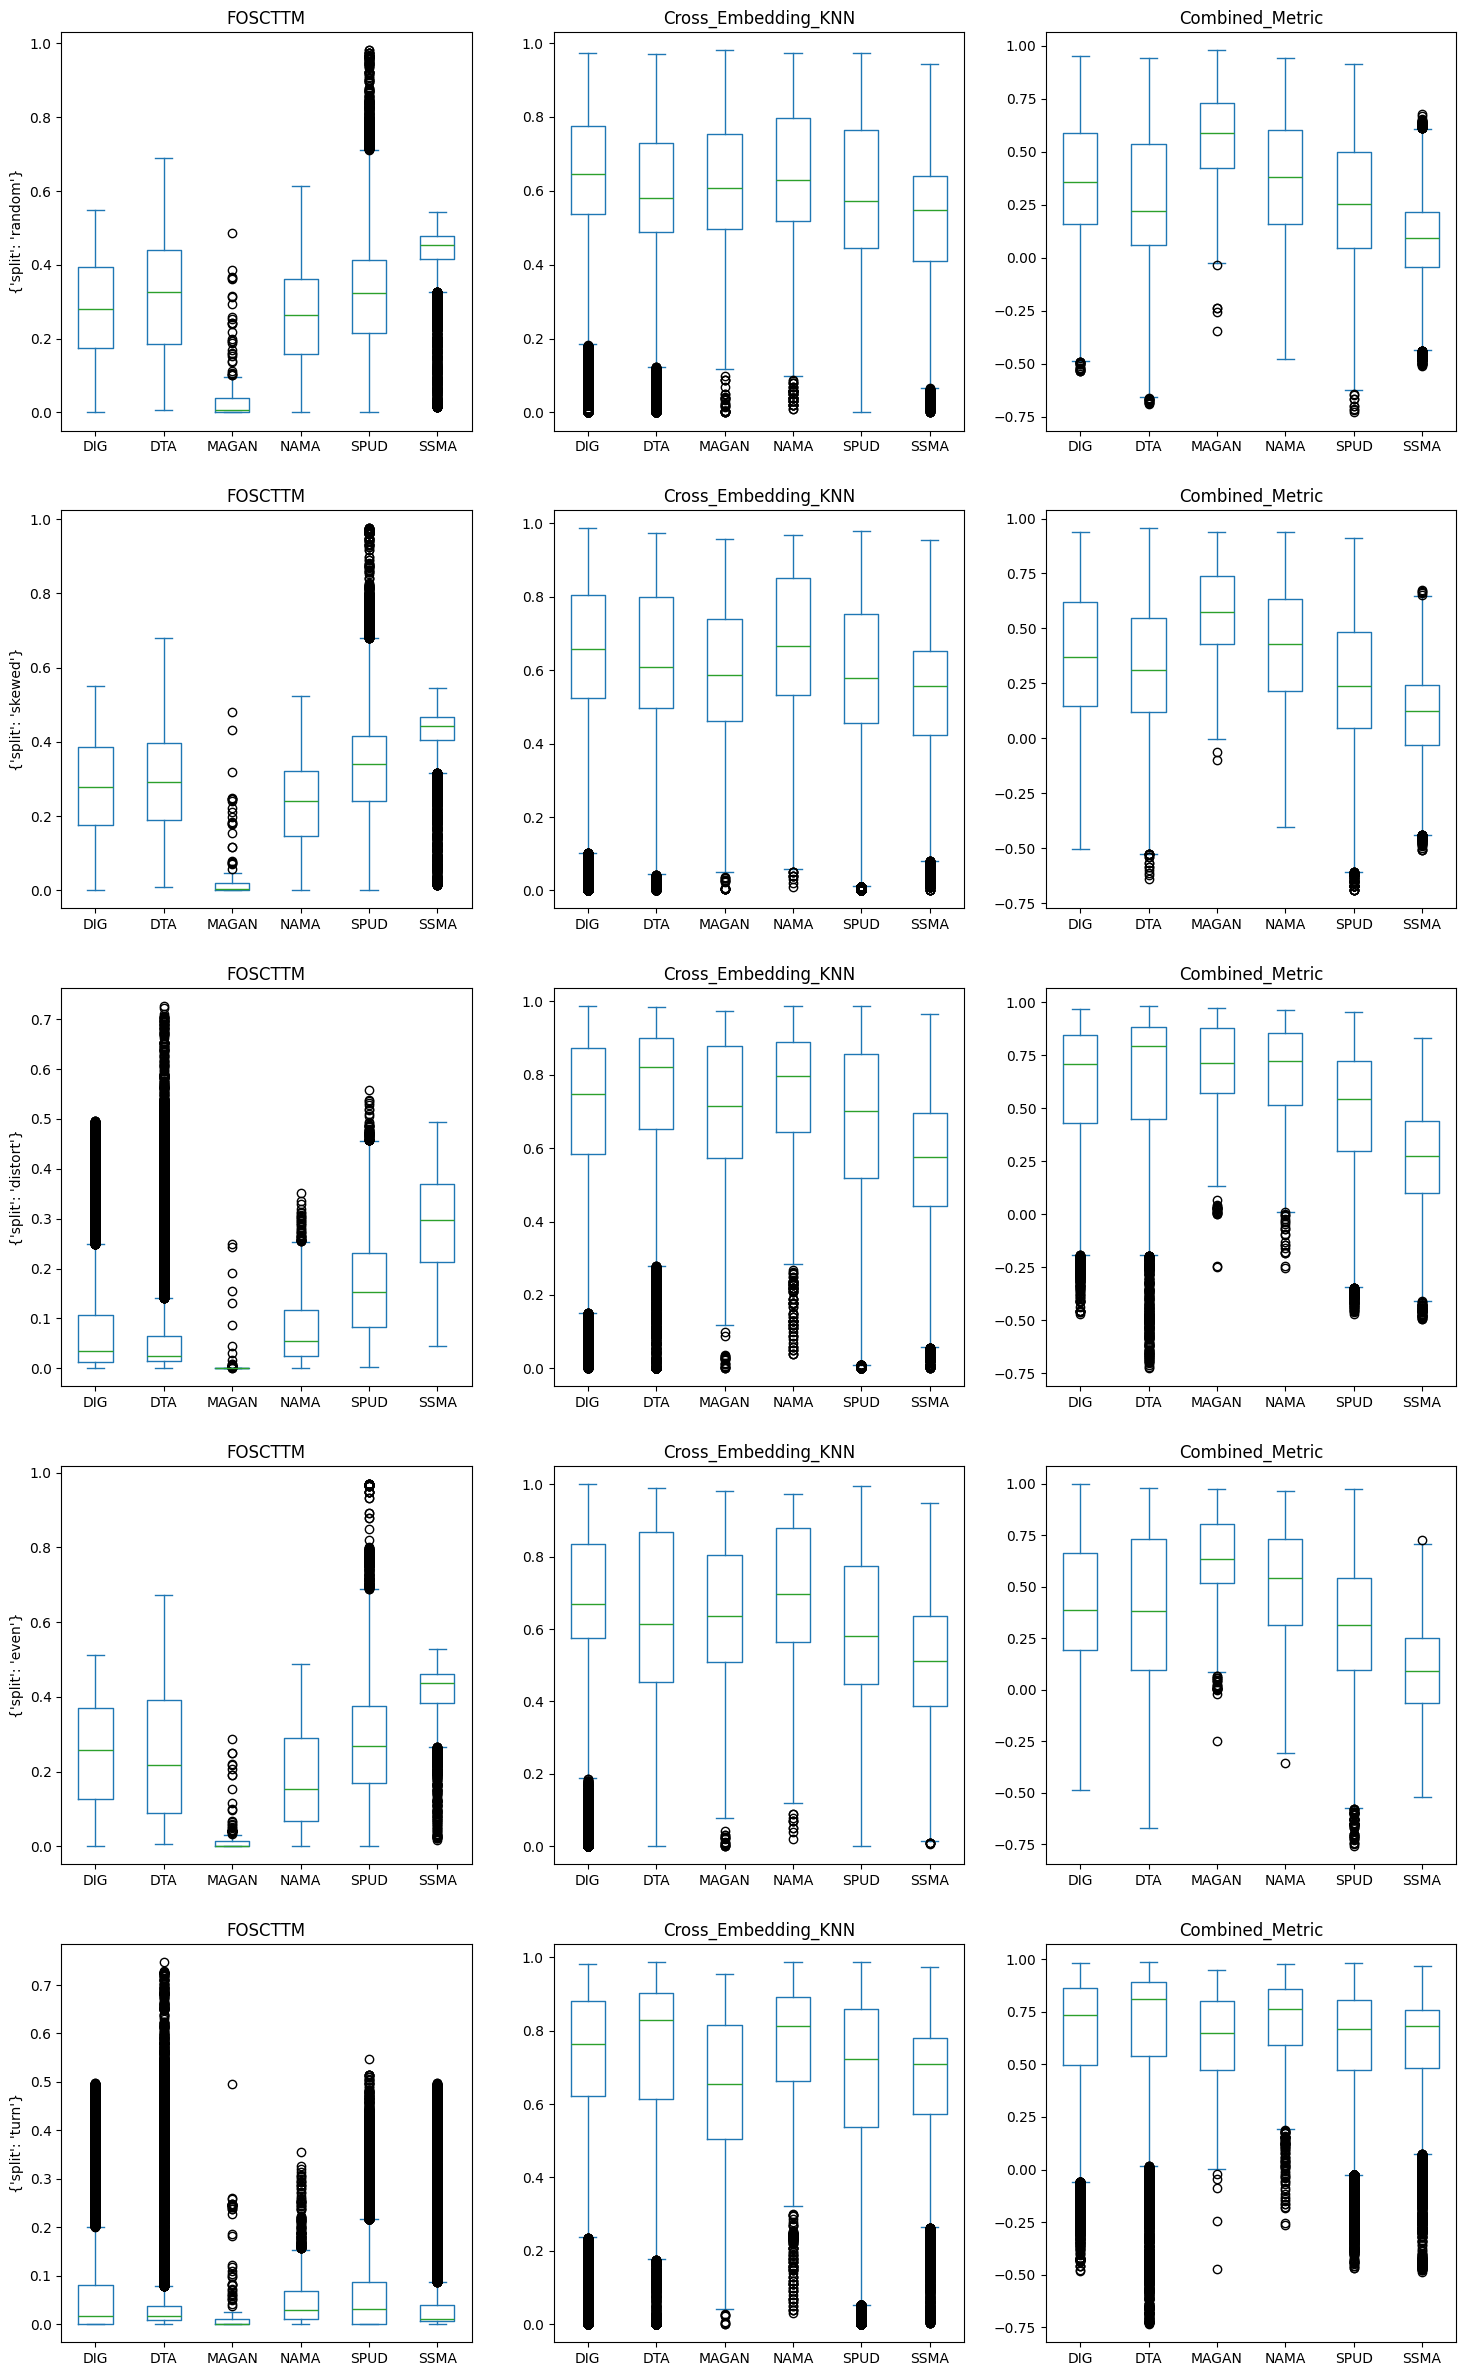

In [13]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Arguments within the same Methods

### DIG

We See that Page Rank has little effect on the overall graph data

In [9]:
#If we want to see only a few csv files at a time, we can sub set it here
#df_subset2 = df[df["csv_file"] == "glass"]

#To see all of it combined
df_subset2 = df

#Change the method to DIG
df_subset2 = df_subset2[df_subset2["method"] == "DIG"]

In [10]:
df_subset2.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,Combined_Metric
612835,Medicaldataset,DIG,4278,even,137.0,0.11,0.30,None,0.159123,NaN,NaN,0.358077,0.614860,0.256782
108123,tic-tac-toe,DIG,3346,even,82.0,0.09,0.05,off-diagonal,0.339668,NaN,NaN,0.471080,0.569937,0.098858
99521,balance_scale,DIG,8189,random,106.0,0.17,0.10,None,0.301186,NaN,NaN,0.476413,0.686400,0.209987
334553,hepatitis,DIG,2973,distort,8.0,0.05,0.30,off-diagonal,0.304951,NaN,NaN,0.009767,0.746377,0.736610
263686,hill_valley,DIG,1825,turn,2.0,0.01,0.50,full,0.419723,NaN,NaN,0.000708,0.671617,0.670909


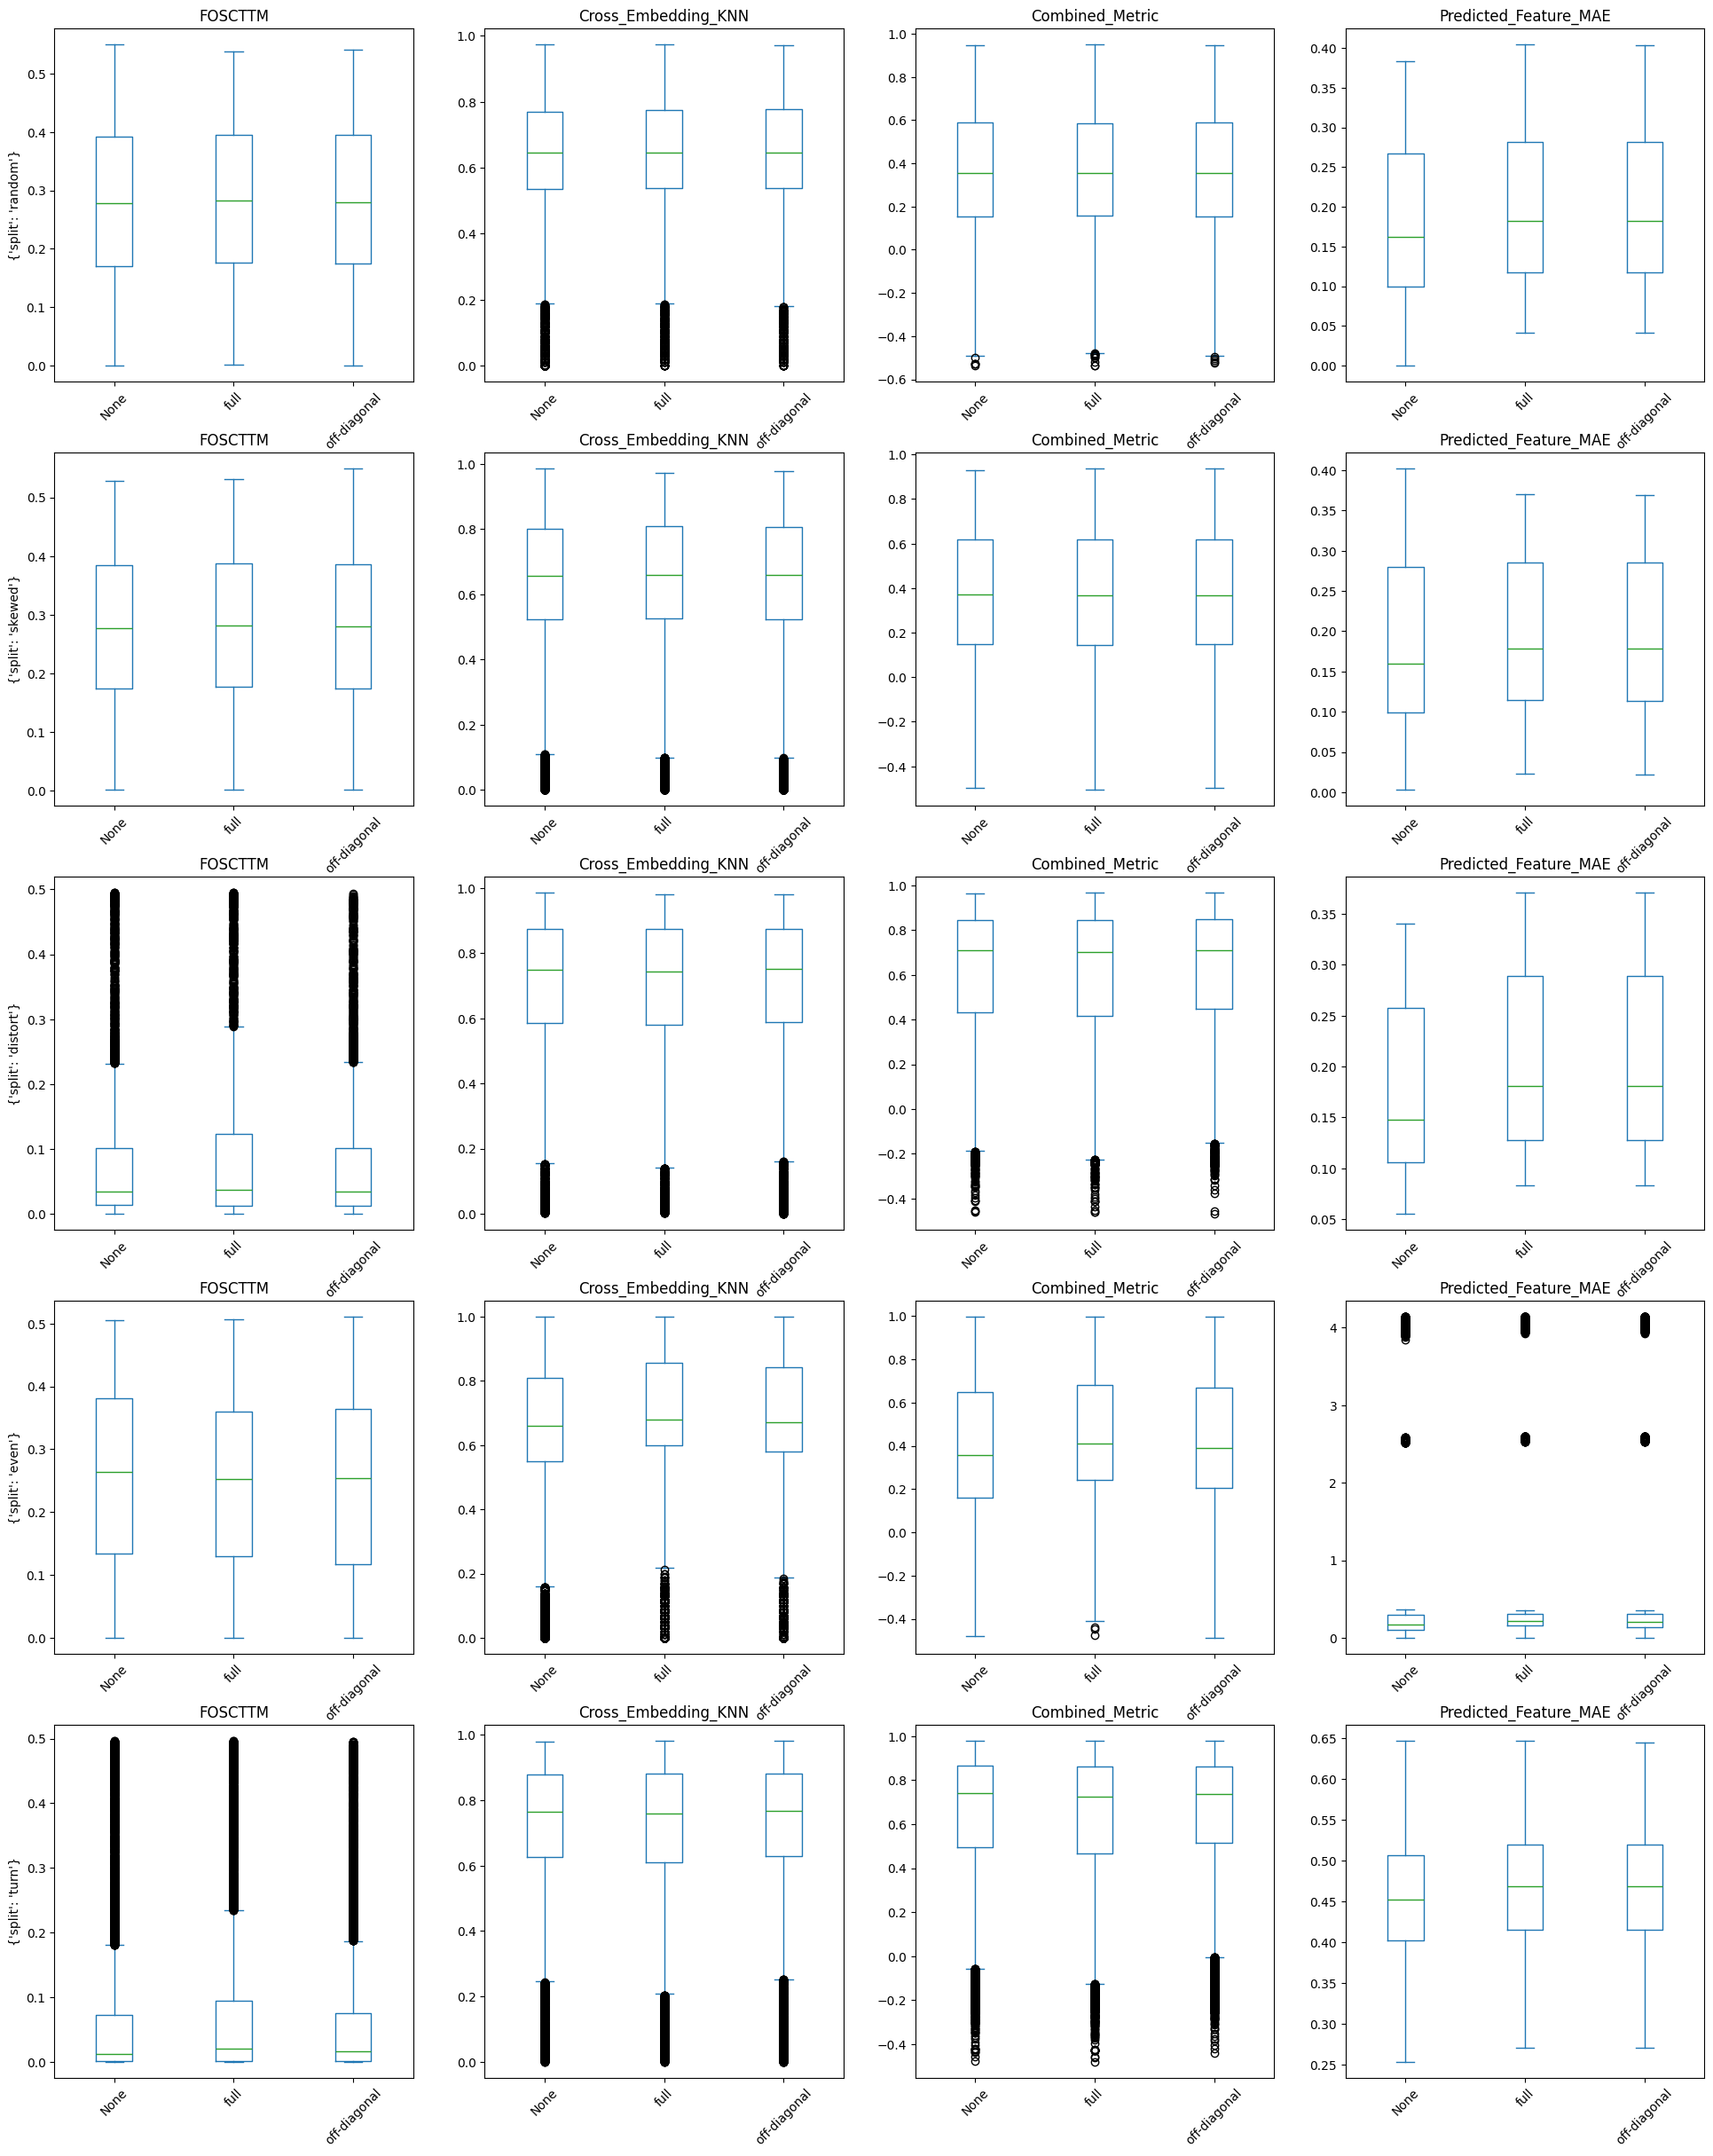

In [11]:

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}, {"column": "Predicted_Feature_MAE"}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='Page_Rank', kind = 'box',  rot = 45)

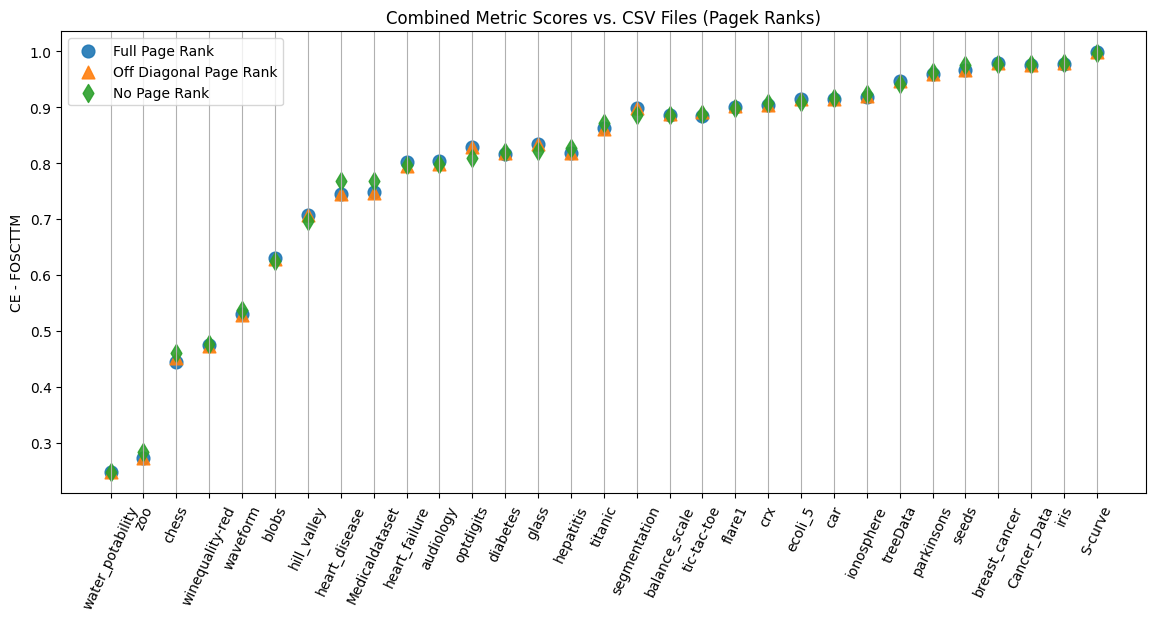

In [12]:
#Create an aggregate DF 
agregate_df = pd.DataFrame({
    'Full_Page_Rank': df[df["Page_Rank"] == "off-diagonal"].groupby("csv_file")["Combined_Metric"].max(),
    'Off-Diagonal_Page_Rank': df[df["Page_Rank"] == "full"].groupby("csv_file")["Combined_Metric"].max(),
    'No_Page_Rank': df[df["Page_Rank"] == "None"].groupby("csv_file")["Combined_Metric"].max()
})


agregate_df = agregate_df.sort_values(by = "No_Page_Rank").reset_index()

#To make it easier to add edits
key_words = {"x" : agregate_df.index,
            "s" : 84,
            "alpha" : .90}

plt.figure(figsize=(14, 6))
ax = plt.scatter(y = agregate_df["Full_Page_Rank"], label = "Full Page Rank", **key_words) #I'm back and forth on the helpfulness of the markers
ax = plt.scatter(y = agregate_df["Off-Diagonal_Page_Rank"], marker = '^', label = "Off Diagonal Page Rank", **key_words)
ax = plt.scatter(y = agregate_df["No_Page_Rank"], marker = 'd', label = "No Page Rank", **key_words)


#Show Legend
plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
plt.title(f"Combined Metric Scores vs. CSV Files (Pagek Ranks)")
plt.ylabel("CE - FOSCTTM")
plt.grid(visible=True, axis = "x")
plt.legend()
plt.show()

### SPUD

Notes:
1. Distance + Avg seems to be the best metric most of the time, although they seem pretty similar

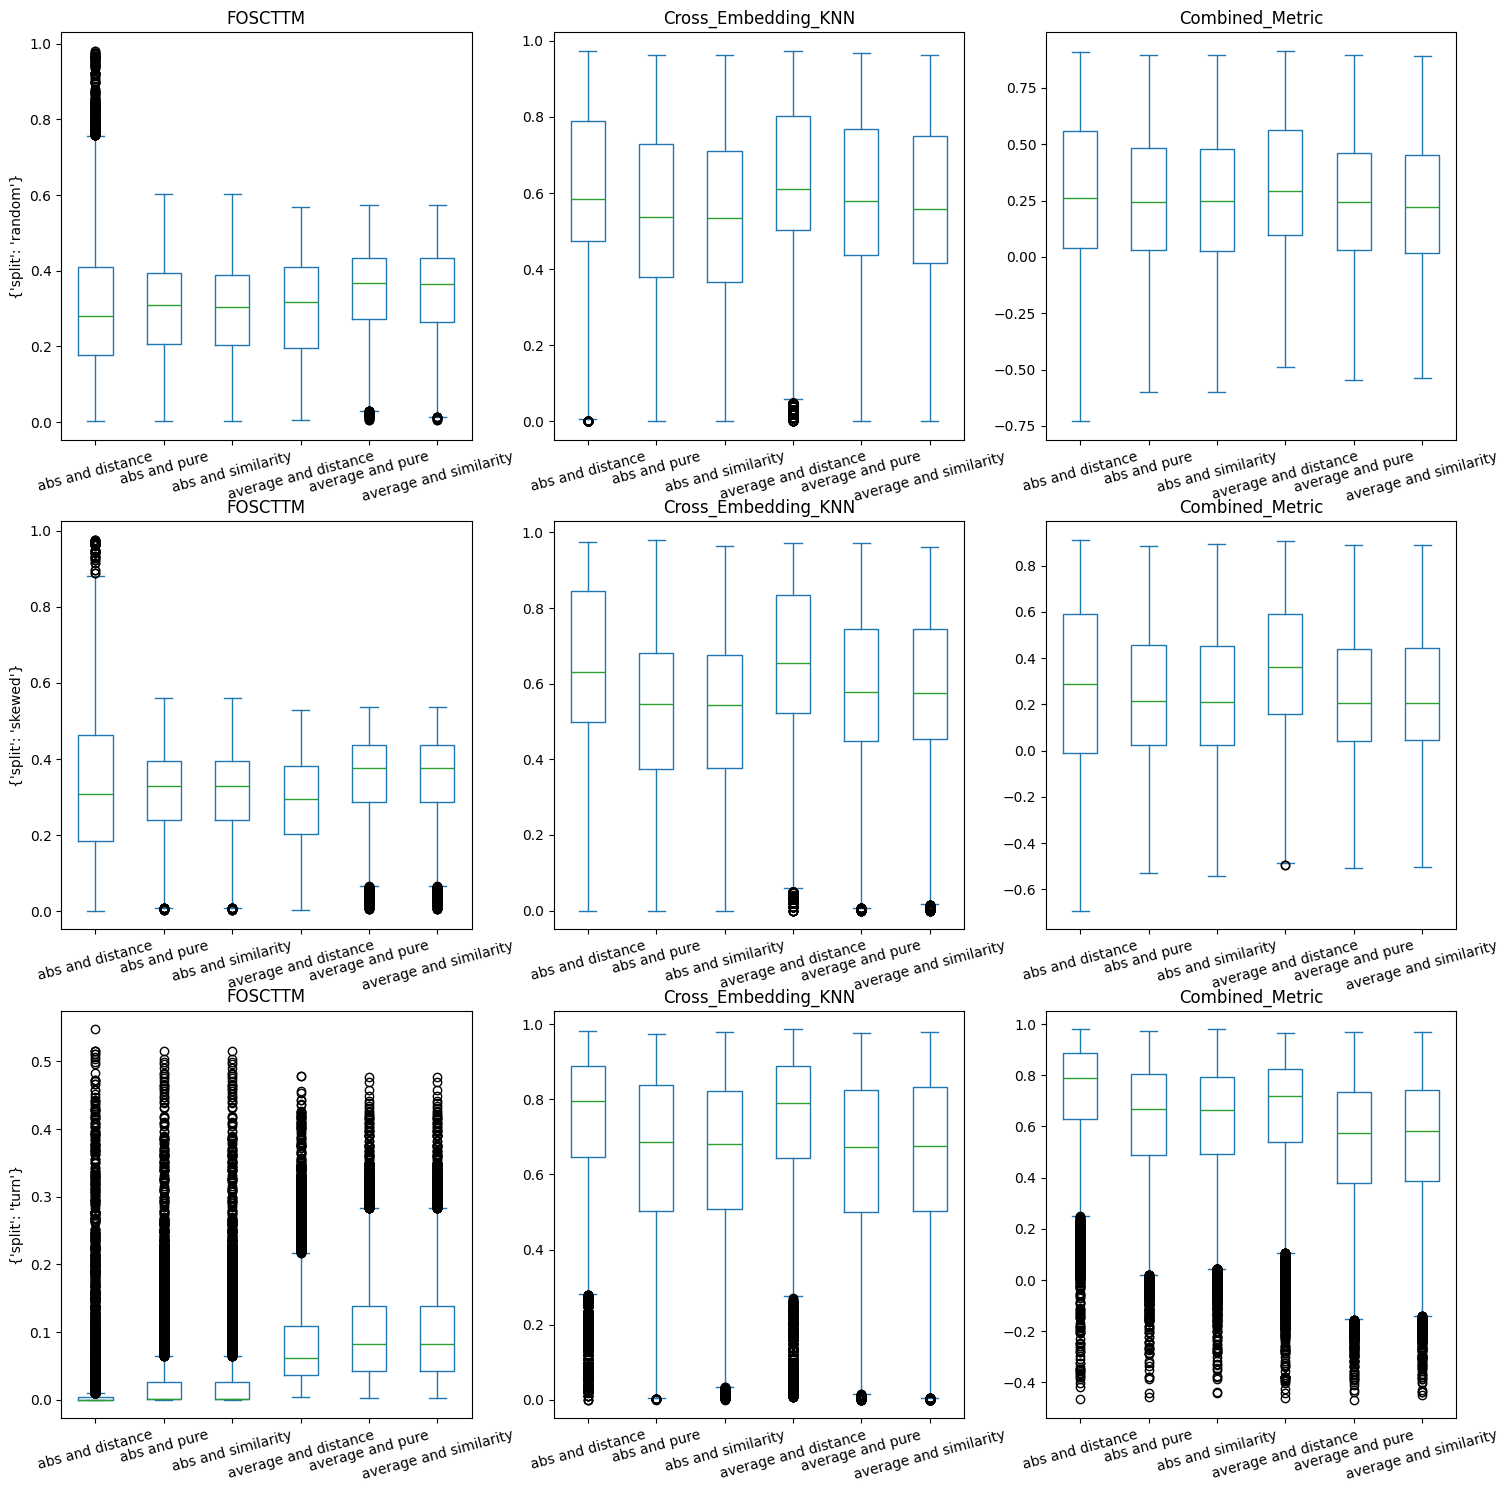

In [13]:
#To make it easier to add edits
key_words = {"figsize": (10, 6),
            "kind": "box",
            "by": "Combined_Arguments",
            "rot": 15}

#Combine DIG argumenst
df_sub = df
df_sub["Combined_Arguments"] = df_sub["Operation"]+ " and " + df_sub["SPUDS_Algorithm"]

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed"#, "csv_file" : "iris"
         }, 
        {"split" : "turn"#, "csv_file" : "iris"
         }]

plot_in_fig(df = df_sub, columns = columns, rows = rows, **key_words)

## Comparing Methods against CSV Files

DTA seems to be the best on split methods that are made arbitrarily, like the "turn" and the "distort", where as DIG and SPUD preform the best when the data is split "random" or skewed

In [16]:
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 'Predicted_Feature_MAE', 'Operation',
       'SPUDS_Algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric'],
      dtype='object')

In [47]:
def plt_methods_by_CSV_max(df = df, sort_by = "SPUD", metric = "Combined_Metric", return_df =False):
    """df should equal the dataframe. It can be subsetted already
    
    Plots the max of the combined metric for each method to each CSV_File
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].max(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].max(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].max(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].max(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].max(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].max(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].max(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].max()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index,
                "s" : 96,
                "alpha" : .90}

    plt.figure(figsize=(16, 6))
    ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words) 
    ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "DIG", **key_words)
    ax = plt.scatter(y = agregate_df["SSMA"],  marker = 'x', label = "SSMA", **key_words)
    ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)
    ax = plt.scatter(y = agregate_df["MAGAN"], marker = 'h', color = "black", label = "MAGAN", **key_words)

    #Plot the ground truths
    ax = plt.scatter(y = agregate_df["Split_A"], marker = '.', label = "Split A", **key_words)
    ax = plt.scatter(y = agregate_df["Split_B"], marker = '_', label = "Split B", **key_words)


    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MAX)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

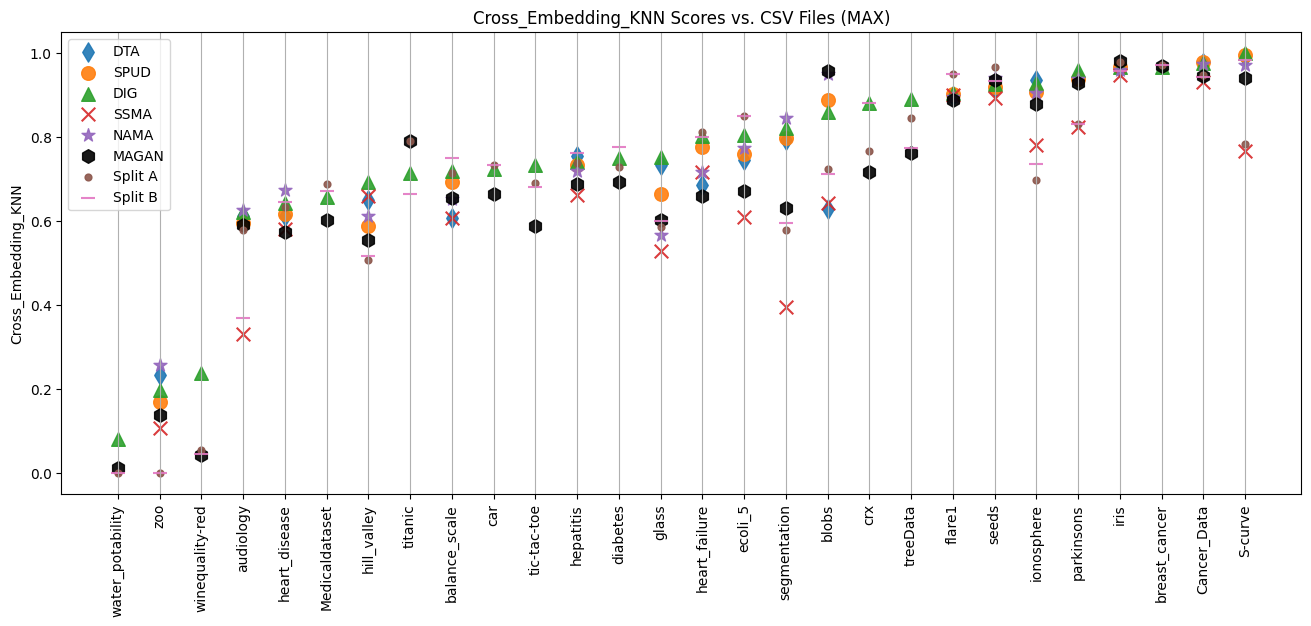

In [164]:
#plt_methods_by_CSV_max(df = df, sort_by = "DIG") #This shows all of the data gather
plt_methods_by_CSV_max(df = subset_df(df, split = "even"), metric = "Cross_Embedding_KNN", sort_by="DIG")

In [14]:
plt_methods_by_CSV_max(df = subset_df(df, split = "turn"), sort_by="DIG")

NameError: name 'plt_methods_by_CSV_max' is not defined

In [187]:
def plt_methods_by_CSV_mean(df = df, sort_by = "SPUD", metric = "Combined_Metric", return_df = False):
    """Plots 95 percent confident intervals for each method against csv files
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].mean(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].mean(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].mean(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].mean(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].mean(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].mean(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].mean(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].mean()
    })

    #Calculate error bars
    err_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].std() *2,
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].std() *2,
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].std() *2 ,
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].std()*2,
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].std()*2,
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].std()*2,
            'Split_A': df.groupby("csv_file")["A_Classification_Score"].std()*2,
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].std() *2
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"ms" : 8,
                "alpha" : .75}

    plt.figure(figsize=(20, 6))
    ax = plt.errorbar(x = agregate_df.index - 0.1, y = agregate_df["DTA"], yerr = err_df["DTA"], fmt = ".", label = "DTA", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD"], yerr = err_df["SPUD"], fmt = ".", label = "SPUD", **key_words) 
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["DIG"], yerr = err_df["DIG"],fmt = '.', label = "DIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["SSMA"], yerr = err_df["SSMA"],fmt = '.', label = "SSMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index - 0.2, y = agregate_df["NAMA"], yerr = err_df["NAMA"],fmt = '.', label = "NAMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.3, y = agregate_df["MAGAN"], yerr = err_df["MAGAN"],fmt = '.', color = "black", label = "SSMA", **key_words)


    ax = plt.errorbar(x = agregate_df.index+ 0.4, y = agregate_df["Split_A"], yerr = err_df["Split_A"], fmt = "_", label = "Split_A", **key_words) 
    ax = plt.errorbar(x = agregate_df.index - 0.3, y = agregate_df["Split_B"], yerr = err_df["Split_B"], fmt = "_", label = "Split_B", **key_words) 


    plt.ylim([-0.3, 1])

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MEAN)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

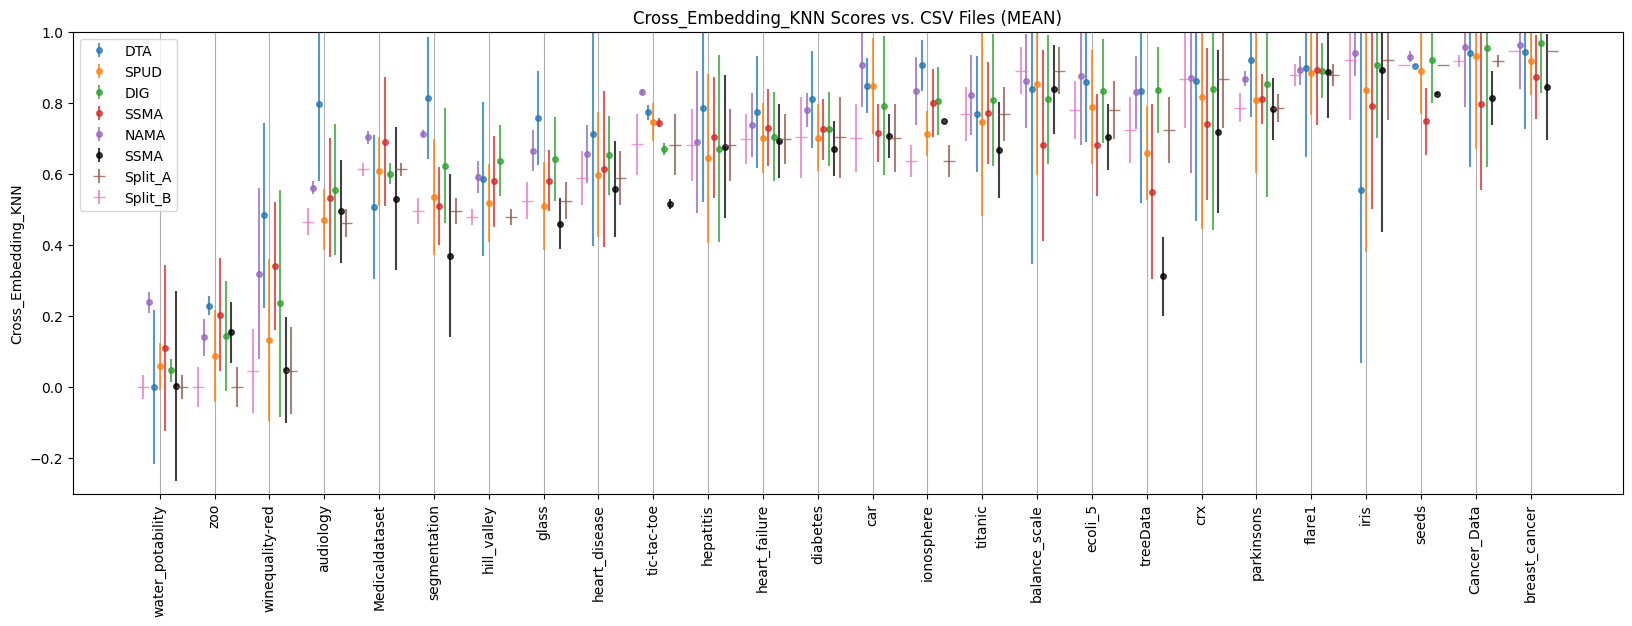

In [189]:
#plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
plt_methods_by_CSV_mean(df = subset_df(df, split = "turn"), metric = "Cross_Embedding_KNN", sort_by="DIG")

### Rankings
TODO: Have results for different splits

In [70]:
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 'Predicted_Feature_MAE', 'Operation',
       'SPUDS_Algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric'],
      dtype='object')

In [212]:
#### STILL WORKING ON THE UPDATES TO THIS FUNCTION ____ TRYING TO IMPLEMENT A MEASURE OF DISTANCE FROM SPLITS

def get_ranks(show_more = False, **kwargs):
    #Sort by Split
    split_df = subset_df(df=df, **kwargs)

    if "split" in kwargs.keys():
        split = kwargs["split"]
    else:
        split = "No"

    #Sort Df by CSV
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True)
    df_ranked = csv_df.drop(columns= ["csv_file", "Split_A", "Split_B"]).rank(ascending=False, method='max', axis = 1)


    #This shows which method has preformed the Best overall
    print(f"Ranked across {split} Split\n-----------------------\n{df_ranked.mean(axis = 0).sort_values(ascending=True)}")
    if show_more:
        print(f"\n \nSTD of Ranks across {split} Split\n----------------------------\n{df_ranked.std(axis = 0).sort_values(ascending=True)}")
        print(f"\n\nNumber of times each Method did best for each CSV\n--------------------------------------------------\n{csv_df.drop(columns= ['csv_file']).idxmax(axis = 1).value_counts().sort_values(ascending=False)}")
    #print(f"\n \nDistance from Split_A and Split_B with a {split} Split\n----------------------------------------------------------\n{df_ranked[""].std(axis = 0).sort_values(ascending=True)}")

    #Print out the distance from the Split_a and Split b baseling

    #Get th csv file with Cross embedding as th max
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True, metric = "Cross_Embedding_KNN").fillna(0)
    d1 = len(csv_df)
    columns = csv_df.columns[1:-2]

    #Drop the SPlits from the df
    methods_df = csv_df.drop(columns=["csv_file", "Split_A", "Split_B"])

    #Create the baseline Scalar, and drop NaN
    baseline = np.reshape(csv_df.values[:, -2:].max(axis = 1), newshape = (d1,1))

    #Print out average
    print(f"\n\n\n          Distance of CE from Split A and Split B baseline on Average\n------------------------------------------------------------------------------")

    #Calculate the values
    print(pd.DataFrame(np.reshape(np.mean(methods_df.to_numpy() - baseline, axis = 0), newshape = (1,6)), columns = columns))

    if show_more:
        print(f"\n\n\n               Distance of CE from Split A and Split B baseline\n------------------------------------------------------------------------------")

        #Calculate the values
        print(pd.DataFrame(methods_df.to_numpy() - baseline, columns = columns, index = csv_df["csv_file"]))



In [213]:
#NOTE: DIG has the best Preformance :) --> The Rankings reflect often how well each will be away from the main one
get_ranks()

Ranked across No Split
-----------------------
DIG      2.000000
DTA      2.241379
SPUD     3.142857
NAMA     3.892857
SSMA     4.642857
MAGAN    4.928571
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG      NAMA
0  0.024644  0.012378  0.105331  0.079718  0.203375  0.073954


In [214]:
get_ranks(split = "random")

Ranked across random Split
-----------------------
MAGAN    1.769231
DIG      2.225806
NAMA     3.307692
SPUD     3.384615
DTA      4.148148
SSMA     5.846154
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA    MAGAN       DTA      SPUD       DIG      NAMA
0 -0.058508 -0.02545  0.019163  0.006605  0.156354  0.005949


In [215]:
get_ranks(split = "even")

Ranked across even Split
-----------------------
MAGAN    1.888889
DIG      2.071429
NAMA     2.722222
DTA      3.722222
SPUD     4.111111
SSMA     5.722222
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG     NAMA
0 -0.277415 -0.021435 -0.213437 -0.205948  0.046362 -0.20273


In [216]:
get_ranks(split = "skewed")

Ranked across skewed Split
-----------------------
MAGAN    2.038462
DIG      2.192308
NAMA     2.904762
SPUD     3.692308
DTA      3.952381
SSMA     5.761905
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
      SSMA     MAGAN       DTA      SPUD       DIG      NAMA
0 -0.14224 -0.067246 -0.090875  0.013443  0.052871 -0.080615


In [218]:
get_ranks(split = "distort")

Ranked across distort Split
-----------------------
MAGAN    1.0
DIG      2.0
NAMA     3.0
SPUD     4.0
SSMA     5.0
DTA      6.0
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG      NAMA
0 -0.025323  0.017778 -0.022222  0.031111  0.031111  0.031111


In [25]:
get_ranks(split = "turn")

Ranked across turn Split
-----------------------
DTA      2.076923
DIG      2.076923
SPUD     3.000000
NAMA     4.000000
SSMA     4.230769
MAGAN    5.640000
dtype: float64

 
STD of Ranks across turn Split
----------------------------
MAGAN    0.700000
DIG      0.934797
NAMA     0.979796
SPUD     0.979796
SSMA     1.335895
DTA      1.718676
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA     16
DIG      7
SPUD     2
SSMA     1
Name: count, dtype: int64


## Comparing Percent of anchors and KNN values

In [220]:
def line_plot_methods(argument = "Percent_of_Anchors", **kwargs):
    "subset should equal none or the csv file name"

    #Subset the data
    df_subset = subset_df(df, **kwargs)

    #Create figure
    plt.figure(figsize=(14,7))

    #Plot the graphs
    plt.plot(df_subset[df_subset["method"] == "SSMA"].groupby(argument)["Combined_Metric"].mean(), label = "SSMA")
    plt.plot(df_subset[df_subset["method"] == "DTA"].groupby(argument)["Combined_Metric"].mean(), label = "DTA")
    plt.plot(df_subset[df_subset["method"] == "DIG"].groupby(argument)["Combined_Metric"].mean(), label = "DIG")
    plt.axhline(df_subset[df_subset["method"] == "MAGAN"]["Combined_Metric"].mean(), label = "MAGAN", color = "black")


    #Show different SPUD arguments
    plt.plot(df_subset[df_subset["Operation"] == "average"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Avg")
    plt.plot(df_subset[df_subset["Operation"] == "abs"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Abs")

    if argument != "Percent_of_KNN":
        plt.plot(df_subset[df_subset["method"] == "NAMA"].groupby(argument)["Combined_Metric"].mean(), label = "NAMA")



    #Make it pretty
    plt.xlabel(argument)
    plt.ylabel("Combined Metric Score (CE - FOSCTTM)")
    plt.legend()
    plt.title("Methods Together")

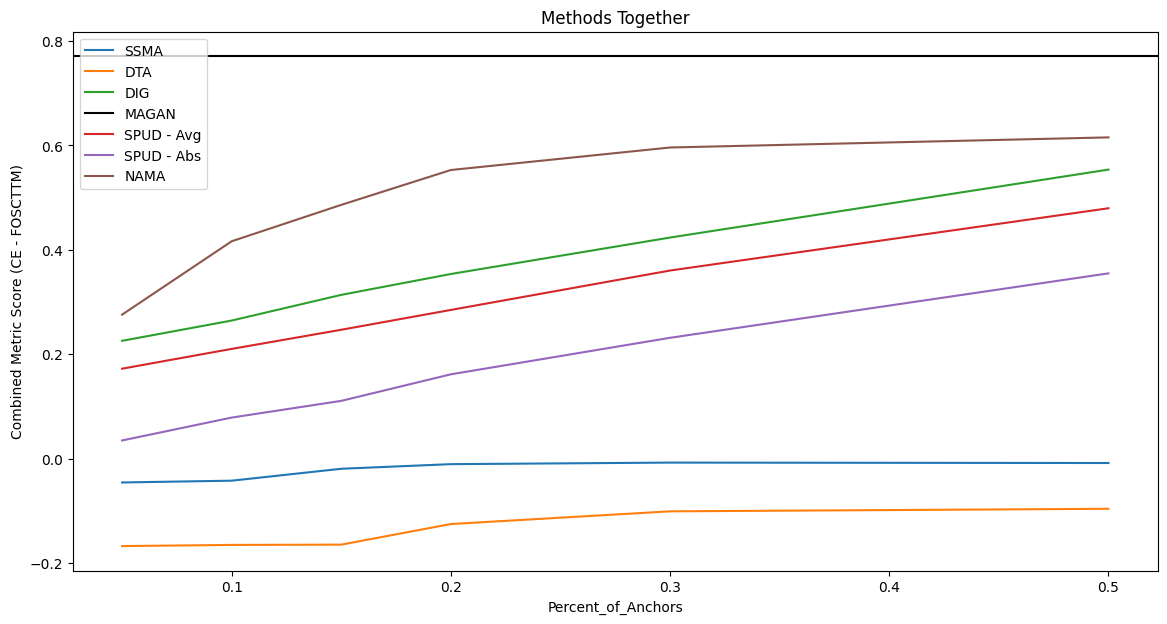

In [221]:
line_plot_methods(csv_file = "blobs", split = "even")

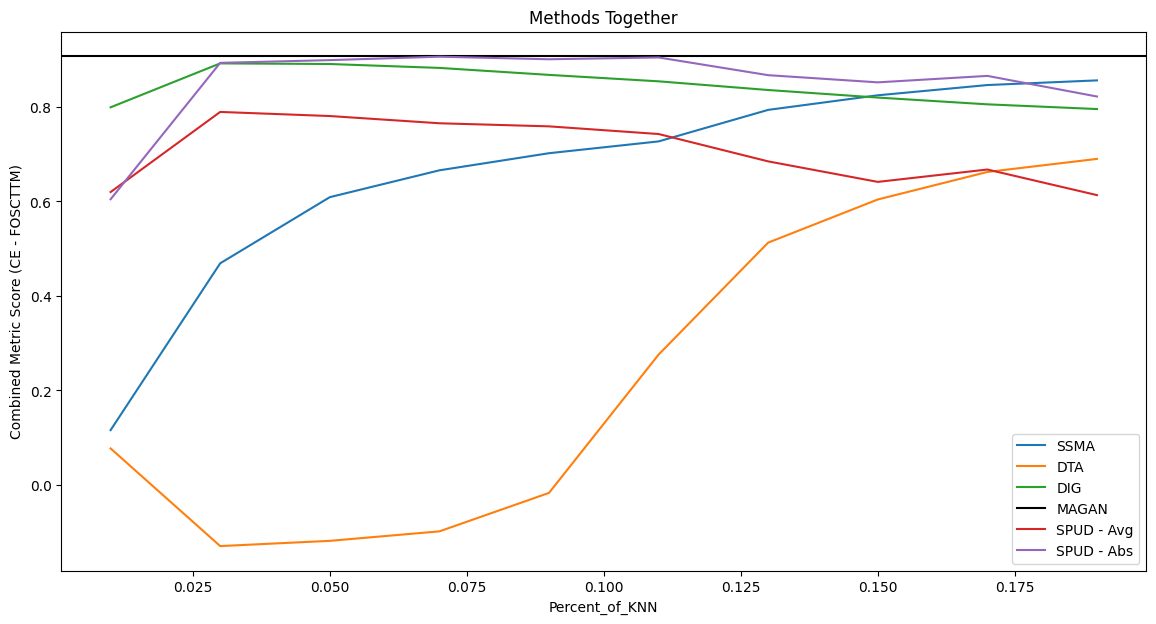

In [222]:
line_plot_methods(argument = "Percent_of_KNN", split = "turn", csv_file = "iris")

## Plotting the Embeddings

Data Sets that dont make sense:
Flare1 - Most of the points belong to the same class, so the CE will be high regardless of alignment

In [4]:
visual_test = tma.test_manifold_algorithms(csv_file="glass.csv", split= "even", percent_of_anchors= [0.1], verbose=2)


 
 
---------------------------       Initalizing class with glass.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (214, 5)
Split B Features shape (214, 4)
MDS initialized with 4 components
The knn values are: (2, 7, 12, 17, 22, 27, 32, 37, 42, 47)


In [5]:
visual_test.plot_embeddings(knn = 5)

Percent of anchors used: 0.1
The amount of Nearest Neighbors: 5


2024-06-03 13:56:54.339550: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 13:56:54.345303: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 13:56:54.446303: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 13:56:56.369841: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:283: RuntimeWarning: Detected zero distance between samples 38 and 39, 66 and 67. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/

# Time Comparisions Below

In [3]:
#Print the complexity of CSV files and the time it takes
time_df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Time_DataFrame.csv").sort_values(by = str("iris.csv"), ignore_index=True)

#Add the amount of features for each csv file
for csv_file in time_df.columns:

    #Continue the loop if the header is Methods
    if csv_file == "Methods":

        #Create dictionaries to store feature count and instance count
        feature_dict = {"Methods" : 0}
        instance_dict = {"Methods" : "Feature Count"}
        complexity_dict = {"Methods" : "Complexity"}

        continue

    #Calulate the spcial cases
    elif csv_file == "S-curve":
        #Count Features
        feature_dict[csv_file] = 600

        #Count Instances
        instance_dict[csv_file] = 3
        complexity_dict[csv_file] = 1800

        continue

    #Calulate the spcial cases
    elif csv_file == "blobs":
        #Count Features
        feature_dict[csv_file] = 300

        #Count Instances
        instance_dict[csv_file] = 2
        complexity_dict[csv_file] = 600

        continue


    file_path = "/yunity/arusty/Graph-Manifold-Alignment/CSV Files/" + csv_file

    #Read file
    df = pd.read_csv(file_path)

    #Count Features
    feature_dict[csv_file] = len(df)

    #Count Instances
    instance_dict[csv_file] = len(df.columns)

    #Calculate complexity 
    complexity_dict[csv_file] = len(df) * len(df.columns)

#Append the Dictionaries
time_df = time_df._append(feature_dict, ignore_index=True)
time_df = time_df._append(instance_dict, ignore_index=True)
time_df = time_df._append(complexity_dict, ignore_index=True)


#Veiw the DataFrame
time_df.T.sort_values(by = 6).T

,Methods,zoo.csv,hepatitis.csv,iris.csv,audiology.csv,parkinsons.csv,seeds.csv,segmentation.csv,glass.csv,heart_disease.csv,...,crx.csv,breast_cancer.csv,titanic.csv,diabetes.csv,tic-tac-toe.csv,Medicaldataset.csv,treeData.csv,winequality-red.csv,car.csv,water_potability.csv
0,DIG,2.051146,3.673588,3.401358,6.11107,6.721155,6.336899,7.850724,5.886319,21.008766,...,96.169371,111.183804,79.618065,169.862753,247.272338,333.91487,606.335758,670.495568,623.620235,713.969006
1,SPUD,1.979575,3.642993,3.596051,6.817885,6.064839,5.099518,8.601908,8.767957,16.608557,...,91.935259,65.580449,49.325496,86.465402,183.209855,364.731992,365.956391,383.02885,473.174882,695.340593
2,SSMA,1.159722,4.248523,4.294494,6.804995,8.124955,11.139338,12.805081,14.13043,28.532746,...,155.000047,198.180893,76.844366,98.089042,276.15585,277.443343,506.298484,666.250582,750.995811,994.201673
3,DTA,1.541715,3.795742,4.622846,9.17517,9.272984,11.307132,11.840308,11.141553,35.958692,...,161.512695,228.14914,82.645041,202.853388,277.613282,298.365653,565.135435,698.865259,760.982209,306.629771
4,NAMA,2.732113,4.872489,6.227232,14.216228,16.270395,10.448334,15.465682,19.214126,45.309474,...,428.882806,458.92959,441.442726,627.065093,1195.106548,3039.580123,3976.05421,5446.704218,6871.173276,10911.287093
5,MAGAN,36.202,60.454023,72.027937,66.887187,63.486195,56.742175,42.748242,61.843572,41.687702,...,95.593119,103.365419,54.630012,60.786258,113.20653,27.341562,497.965705,32.816214,407.051648,653.820618
6,0,101.0,138.0,150.0,190.0,195.0,199.0,211.0,214.0,297.0,...,664.0,699.0,712.0,768.0,958.0,1319.0,1440.0,1599.0,1728.0,2011.0
7,Feature Count,18.0,16.0,5.0,68.0,23.0,8.0,20.0,10.0,14.0,...,15.0,10.0,8.0,9.0,10.0,9.0,61.0,12.0,7.0,11.0
8,Complexity,1818.0,2208.0,750.0,12920.0,4485.0,1592.0,4220.0,2140.0,4158.0,...,9960.0,6990.0,5696.0,6912.0,9580.0,11871.0,87840.0,19188.0,12096.0,22121.0


In [4]:
time_df.T.sort_values(by = 6).T.drop(columns = ["Methods"]).mean(axis = 1).sort_values()

7       19.321429
1      109.261995
5      110.922727
0      146.838497
3       149.59003
2      162.225399
6      628.321429
4     1237.483256
8    11880.642857
dtype: object